In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.lattice import grid_2d_graph
from networkx.algorithms.shortest_paths.weighted import bidirectional_dijkstra

with open("../data/day15.txt", "r") as f:
    D = np.genfromtxt(f, delimiter=1, dtype=int)

702


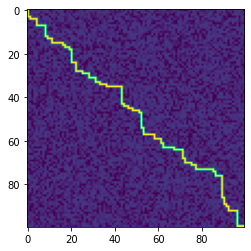

In [2]:
# Puzzle 1
#https://en.wikipedia.org/wiki/Shortest_path_problem

def do_dijkstra(D):
    G = grid_2d_graph(*D.shape, create_using=nx.DiGraph)
    for node in G.nodes:
        weight = D[node]
        for edge in G.in_edges(node):
            G[edge[0]][edge[1]]["weight"] = weight
    return bidirectional_dijkstra(G, (0,0), (D.shape[0]-1, D.shape[1]-1))

path_length, path = do_dijkstra(D)
print(path_length)

M = D.copy()
for step in path:
    M[step] = 50
plt.imshow(M)

In [3]:
# Puzzle 2
X, Y = np.meshgrid(range(5), range(5))
E = np.block([[(D + cell - 1) % 9 + 1 for cell in row] for row in (X + Y)])

path_length, path = do_dijkstra(E)
print(path_length)

2955


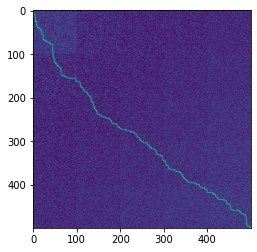

In [4]:
M = E.copy()
for step in path:
    M[step] = 30
plt.imshow(M)